# Combinando datos con Pandas

Datos : http://datos.gob.ar/dataset/siep-indicadores-sectoriales-acero

Link util : https://pandas.pydata.org/pandas-docs/stable/merging.html

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.display import Image

In [5]:
pwd

'/home/human/Dropbox/clusterai/clases/clase_02/2018/clase_02-master'

Tenemos datos distribuidos en 4 datasets. Queremos trabajar con ellos en conjunto. Importamos los 4 datasets y procederemos a combinarlos para generar nuevas tablas.

In [6]:
expo = pd.read_csv('/home/human/Dropbox/clusterai/clases/clase_02/2018/clase_02-master/clusterai_2019_clase02_dataset_acero-exportaciones-series.csv')
impo = pd.read_csv('/home/human/Dropbox/clusterai/clases/clase_02/2018/clase_02-master/clusterai_2019_clase02_dataset_acero-importaciones-series.csv')
prod = pd.read_csv('/home/human/Dropbox/clusterai/clases/clase_02/2018/clase_02-master/clusterai_2019_clase02_dataset_acero-produccion-series.csv')
consumo = pd.read_csv('/home/human/Dropbox/clusterai/clases/clase_02/2018/clase_02-master/clusterai_2019_clase02_dataset_acero-consumo-series.csv')

In [9]:
# observamos cada dataframe
prod.head(2)

,indice_tiempo,acero_produccion
0,1993-01-01,214500
1,1993-02-01,169000


In [11]:
# observamos cada dataframe
impo.head(2)

,indice_tiempo,acero_importaciones_acero,acero_importaciones_barras,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_importaciones_rieles,acero_importaciones_tubos_con_costura,acero_importaciones_tubos_sin_costura
0,1992-01-01,0,0.0,17.7,259.9,0.1,4.0,1.1
1,1992-04-01,0,0.0,19.4,246.8,0.0,1.2,3.1


In [12]:
# observamos cada dataframe
prod.head(2)

,indice_tiempo,acero_produccion
0,1993-01-01,214500
1,1993-02-01,169000


In [13]:
# observamos cada dataframe
consumo.head(2)

,indice_tiempo,acero_consumo_tubos_sin_costura,acero_consumo_laminados_planos,acero_consumo_laminados_largos
0,2008-01-01,65,801,438
1,2008-04-01,84,787,524


In [14]:
# Existe una diferencia en unidades, la produccion esta en toneladas y las importaciones en miles de toneladas
# Transformamos los datos...
prod.acero_produccion = prod.acero_produccion/1000

Observamos como queda la nueva columna de "acero_produccion" del dataframe "prod" luego de haber transformado

In [15]:
prod.head()

,indice_tiempo,acero_produccion
0,1993-01-01,214.5
1,1993-02-01,169.0
2,1993-03-01,238.7
3,1993-04-01,250.2
4,1993-05-01,261.2


### Trabajar con Fechas
utilizaremos el comando pd.to_datetime(columna) para re-escribir la columna "indice_tiempo" que estaba inicialmente como string.

- a la columna transformada en datos con formato de fecha podemos aplicarle .dt.year o .dt.month o dt.day para obtener año, mes o dia de esa columna.

In [18]:
#Unificamos los datos para tener mediciones por año
expo.indice_tiempo = pd.to_datetime(expo.___nombre_columna___) #### indicar que columna queremos transformar #####
expo['year'] = expo.indice_tiempo.dt.year #creamos una nueva columna "year" con .dt.year sobre la col "indice_tiempo"
expo.head()

,indice_tiempo,acero_exportaciones_acero,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_exportaciones_rieles,acero_exportaciones_tubos_con_costura,acero_exportaciones_tubos_sin_costura,year
0,1992-01-01,0.0,4.1,31.4,10.8,3.8,109.3,1992
1,1992-04-01,0.0,25.1,57.5,20.5,1.6,125.8,1992
2,1992-07-01,0.0,21.7,69.8,28.6,1.4,61.8,1992
3,1992-10-01,0.0,10.1,65.2,14.8,4.3,173.9,1992
4,1993-01-01,0.0,19.1,136.9,1.4,7.0,105.5,1993


Applicamos un .groupby() sobre "year" y creamos un nuevo dataframe llamado "expo_by_year"

In [20]:
#Vamos a trabajar unicamente de aceros laminados 
#Sumamos la cantidad de exportaciones por año
expo_by_year = expo.groupby(["year"])["acero_exportaciones_laminados_largos", "acero_exportaciones_laminados_planos"].sum()
expo_by_year.head()

,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos
year,,
1992,61.0,223.9
1993,99.5,269.6
1994,161.3,295.2
1995,258.8,559.3
1996,226.4,457.4


con el comando .plot() sobre un dataframe, **si las columnas son numéricas y representan lo mismo** podemos graficarlas en un mismo grafico. Esto es una alternativa rapida a matplotlib y seaborn

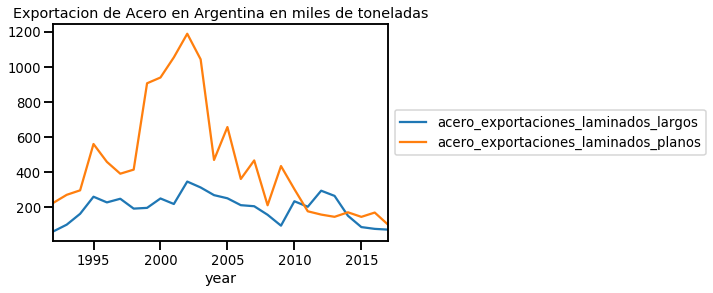

In [27]:
sns.set_context("talk", font_scale=0.8)
expo_by_year.plot(title = "Exportacion de Acero en Argentina en miles de toneladas" )
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

¿que observamos de este grafico?

In [10]:
#Hacemos lo mismo con las importaciones ahora
impo.indice_tiempo = ##### transformamos una columna de fechas a "datetime"
impo['year'] = #### generamos una columna nueva para guardar los años

In [11]:
impo_by_year = #### hacemos un groupby de la columna "year" que creamos para "acero_importaciones_laminados_largos","acero_importaciones_laminados_planos"
impo_by_year.head()

,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos
year,,
1992,87.5,910.0
1993,113.8,388.7
1994,130.6,371.6
1995,96.5,321.1
1996,155.7,351.3


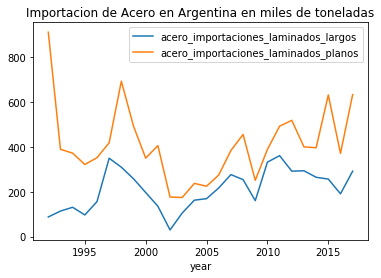

In [12]:
#Graficamos el nuevo dataframe generado "impo_by_year"
impo_by_year.plot(title = "Importacion de Acero en Argentina en miles de toneladas")

### Como hacemos si queremos tener todos los datos en un mismo grafico?
### pandas concat!
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.concat.html

- realizaremos un concat de "expo_by_year y de "impo_by_year"
- deberemos determinar si concatenar por columnas o filas (axis)
- determinar si es inner or outter join

In [13]:
expo_and_impo_by_year = pd.concat([expo_by_year,impo_by_year], axis = "??",  join = "outer" , ignore_index = False) #inner or outer join?
expo_and_impo_by_year.head(10)

,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos
year,,,,
1992,61.0,223.9,87.5,910.0
1993,99.5,269.6,113.8,388.7
1994,161.3,295.2,130.6,371.6
1995,258.8,559.3,96.5,321.1
1996,226.4,457.4,155.7,351.3
1997,247.2,390.0,349.1,418.1
1998,191.0,413.2,309.1,692.0
1999,195.2,905.4,257.6,491.8
2000,248.8,938.3,196.3,349.5


Ahora podemos visualizar todos los datos en una misma tabla

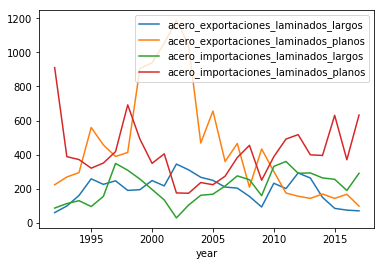

In [14]:
expo_and_impo_by_year.plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

### Opcion axis y join 

Hay dos fomas de concatenar una por las columnas (axis = 1) y otra por las filas (axis = 0), por default es cero, que pasa si cambiamos ese valor?

![Axis diagram](https://www.dataquest.io/blog/content/images/2017/12/axis_diagram.jpg)

Al igual que en bases de datos ralacionales (ejemplo: SQL), Pandas tiene la opcion de realizar merge y join.
    - Joins solo puede realizarse de a dos tablas.
    - Concat va a funcionar cuando tenemos tablas de la misma altura (numero de filas)
    - "Key" es la columna que tienen en comun.
    - Con pd.concat podemos usar inner o outer join
    - Existen 4 tipos de join:  

![Inner join](https://www.dataquest.io/blog/content/images/2017/12/inner-join.png)
![Left join](https://www.dataquest.io/blog/content/images/2017/12/left-join.png)
![Right join](https://www.dataquest.io/blog/content/images/2017/12/right-join.png)
![Full outer join](https://www.dataquest.io/blog/content/images/2017/12/full-outer-join.png)


### Ahora vamos a sumarle nuestros datos de Produccion 

In [15]:
# Modificamos nuestro data-set de produccion para tenerlo de la misma forma que IMPO o EXPO
prod.indice_tiempo =   pd.to_datetime(prod.indice_tiempo)
prod['year'] =  prod.indice_tiempo.dt.year # creamos la columna "year"
prod_by_year = prod.groupby(["year"])["acero_produccion"].sum().to_frame() #sumamos la produccion por cada año
prod_by_year.head(10) # Este data-set incluye datos del 2018!

,acero_produccion
year,
1993,2885.40
1994,3305.00
1995,3568.50
1996,4075.10
1997,4169.87
1998,4215.40
1999,3804.70
2000,4479.22
2001,4108.00


In [16]:
#Unimos los dos datasets "expo_and_impo_by_year" y "prod_by_year"
expo_impo_prod_by_year = pd.merge("dataframe1", "dataframe2", how='left',left_index = True,  right_index = True)
expo_impo_prod_by_year.head(40)

,acero_exportaciones_laminados_largos,acero_exportaciones_laminados_planos,acero_importaciones_laminados_largos,acero_importaciones_laminados_planos,acero_produccion
year,,,,,
1992,61.0,223.9,87.5,910.0,NaN
1993,99.5,269.6,113.8,388.7,2885.40
1994,161.3,295.2,130.6,371.6,3305.00
1995,258.8,559.3,96.5,321.1,3568.50
1996,226.4,457.4,155.7,351.3,4075.10
1997,247.2,390.0,349.1,418.1,4169.87
1998,191.0,413.2,309.1,692.0,4215.40
1999,195.2,905.4,257.6,491.8,3804.70
2000,248.8,938.3,196.3,349.5,4479.22


### Otra forma de usar merge es con el comando join directamente

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html

### En caso de querer agregar mas filas en data-sets similares podemos utilizar pd.append

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.append.html

### Para cerrar...

pd.concat() function: multiproposito y puede ser usado para combinar data-sets por filas o columnas 

DataFrame.append() method: un metodo rapido para agregar filas pero no columnas!

pd.merge() function: util cuando tenemos que unir data-sets con una columna en comun (key) 

DataFrame.join() method: metodo rapido para hacer join pero solo por index (podriamos haberlo usada aca)

### Tarea... (?)

1- Unir el data-set de consumo al ultimo creado para poder graficar todo junto. (tener en cuenta las columnas usadas)

2- Obtener un data-set a partir del punto 1 con cuatro columnas correspondientes a EXPO, IMPO, PROD y CONSUM.

        (Puedo sumar columnas a = b + c y crear un DF, puedo usar pd.sum() o crear columnas y luego hacer drop)
        
3- Graficar el data-set del punto 2 con la libreria sea-born y editando titulos, leyendas, colores, etc. 


### Preguntas ? 



![Axis diagram](https://i.pinimg.com/originals/ec/bf/1c/ecbf1c0337f0623160ac56c89d64d601.jpg)